<a href="https://colab.research.google.com/github/SINGHL25/Tolling_System_Playground/blob/main/notebooks/01_Passage_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Speed and flow visualizations
if 'speed_mph' in passages_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Speed and Flow Analysis', fontsize=16, fontweight='bold')

    # Speed histogram
    axes[0, 0].hist(passages_df['speed_mph'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(passages_df['speed_mph'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {passages_df["speed_mph"].mean():.1f}')
    axes[0, 0].axvline(passages_df['speed_mph'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {passages_df["speed_mph"].median():.1f}')
    axes[0, 0].set_title('Speed Distribution')
    axes[0, 0].set_xlabel('Speed (mph)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()

    # Speed box plot by lane
    lane_speeds = [passages_df[passages_df['lane_id'] == lane]['speed_mph'].dropna() for lane in passages_df['lane_id'].unique()]
    axes[0, 1].boxplot(lane_speeds, labels=passages_df['lane_id'].unique())
    axes[0, 1].set_title('Speed Distribution by Lane')
    axes[0, 1].set_xlabel('Lane ID')
    axes[0, 1].set_ylabel('Speed (mph)')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Speed vs Time scatter plot
    sample_data = passages_df.sample(min(1000, len(passages_df)))  # Sample for performance
    scatter = axes[1, 0].scatter(sample_data['timestamp'], sample_data['speed_mph'], alpha=0.6, c=sample_data['speed_mph'], cmap='viridis', s=20)
    axes[1, 0].set_title('Speed vs Time')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Speed (mph)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    plt.colorbar(scatter, ax=axes[1, 0], label='Speed (mph)')

    # Traffic volume over time
    daily_volumes = passages_df.groupby(passages_df['timestamp'].dt.date).size()
    axes[1, 1].plot(daily_volumes.index, daily_volumes.values, linewidth=2, marker='o', markersize=4, color='purple')
    axes[1, 1].set_title('Daily Traffic Volume')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Vehicle Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

NameError: name 'passages_df' is not defined

# Task
Explain the error in the provided code for visualizing traffic data, fix it, and incorporate the changes into the existing code. The code is expected to generate visualizations based on a dataset containing traffic passage information.

## Load data

### Subtask:
Load the dataset containing traffic passage information into a pandas DataFrame named `passages_df`.


**Reasoning**:
The first step is to load the data into a pandas DataFrame as requested by the subtask. This requires importing the pandas library and then reading the CSV file into a DataFrame named `passages_df`.



In [4]:
import pandas as pd

passages_df = pd.read_csv('traffic_passages.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'traffic_passages.csv'

## Load data

### Subtask:
Load the dataset containing traffic passage information into a pandas DataFrame named `passages_df`.


**Reasoning**:
Based on the previous attempt, the file 'traffic_passages.csv' was not found. Since I cannot access external files or upload them, and the available files do not seem to be the required traffic data, I will simulate a DataFrame with the expected column names to proceed with the task as requested in the instructions.



In [5]:
import pandas as pd
import numpy as np

# Simulate a DataFrame with expected column names
data = {
    'speed_mph': np.random.uniform(10, 70, 1000),
    'lane_id': np.random.choice([1, 2, 3, 4], 1000),
    'timestamp': pd.to_datetime(pd.date_range('2023-01-01', periods=1000, freq='min'))
}
passages_df = pd.DataFrame(data)

# Introduce some missing values for robustness
passages_df.loc[np.random.choice(passages_df.index, 50, replace=False), 'speed_mph'] = np.nan
passages_df.loc[np.random.choice(passages_df.index, 20, replace=False), 'lane_id'] = np.nan

display(passages_df.head())

,speed_mph,lane_id,timestamp
0,16.012140,3.0,2023-01-01 00:00:00
1,14.600802,1.0,2023-01-01 00:01:00
2,52.209818,1.0,2023-01-01 00:02:00
3,62.548296,4.0,2023-01-01 00:03:00
4,27.771812,3.0,2023-01-01 00:04:00


## Inspect and prepare data

### Subtask:
Examine the DataFrame to ensure it contains the necessary columns (`speed_mph`, `lane_id`, `timestamp`) and prepare the data for visualization (e.g., convert timestamp to datetime objects if needed).


**Reasoning**:
Display the column names and their data types of the `passages_df` DataFrame and the first few rows to verify the presence of the required columns, their types, and the timestamp format.



In [6]:
display(passages_df.info())
display(passages_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   speed_mph  950 non-null    float64       
 1   lane_id    980 non-null    float64       
 2   timestamp  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.6 KB


None

,speed_mph,lane_id,timestamp
0,16.012140,3.0,2023-01-01 00:00:00
1,14.600802,1.0,2023-01-01 00:01:00
2,52.209818,1.0,2023-01-01 00:02:00
3,62.548296,4.0,2023-01-01 00:03:00
4,27.771812,3.0,2023-01-01 00:04:00


## Visualize data

### Subtask:
Run the code to generate the speed and flow visualizations using the loaded and prepared `passages_df`.


**Reasoning**:
The `NameError` indicates that `passages_df` was not defined when the code cell was executed. However, the notebook state shows that `passages_df` is now available. Therefore, the code cell can be executed again to generate the visualizations.



/tmp/ipython-input-804846922.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 1].boxplot(lane_speeds, labels=passages_df['lane_id'].unique())


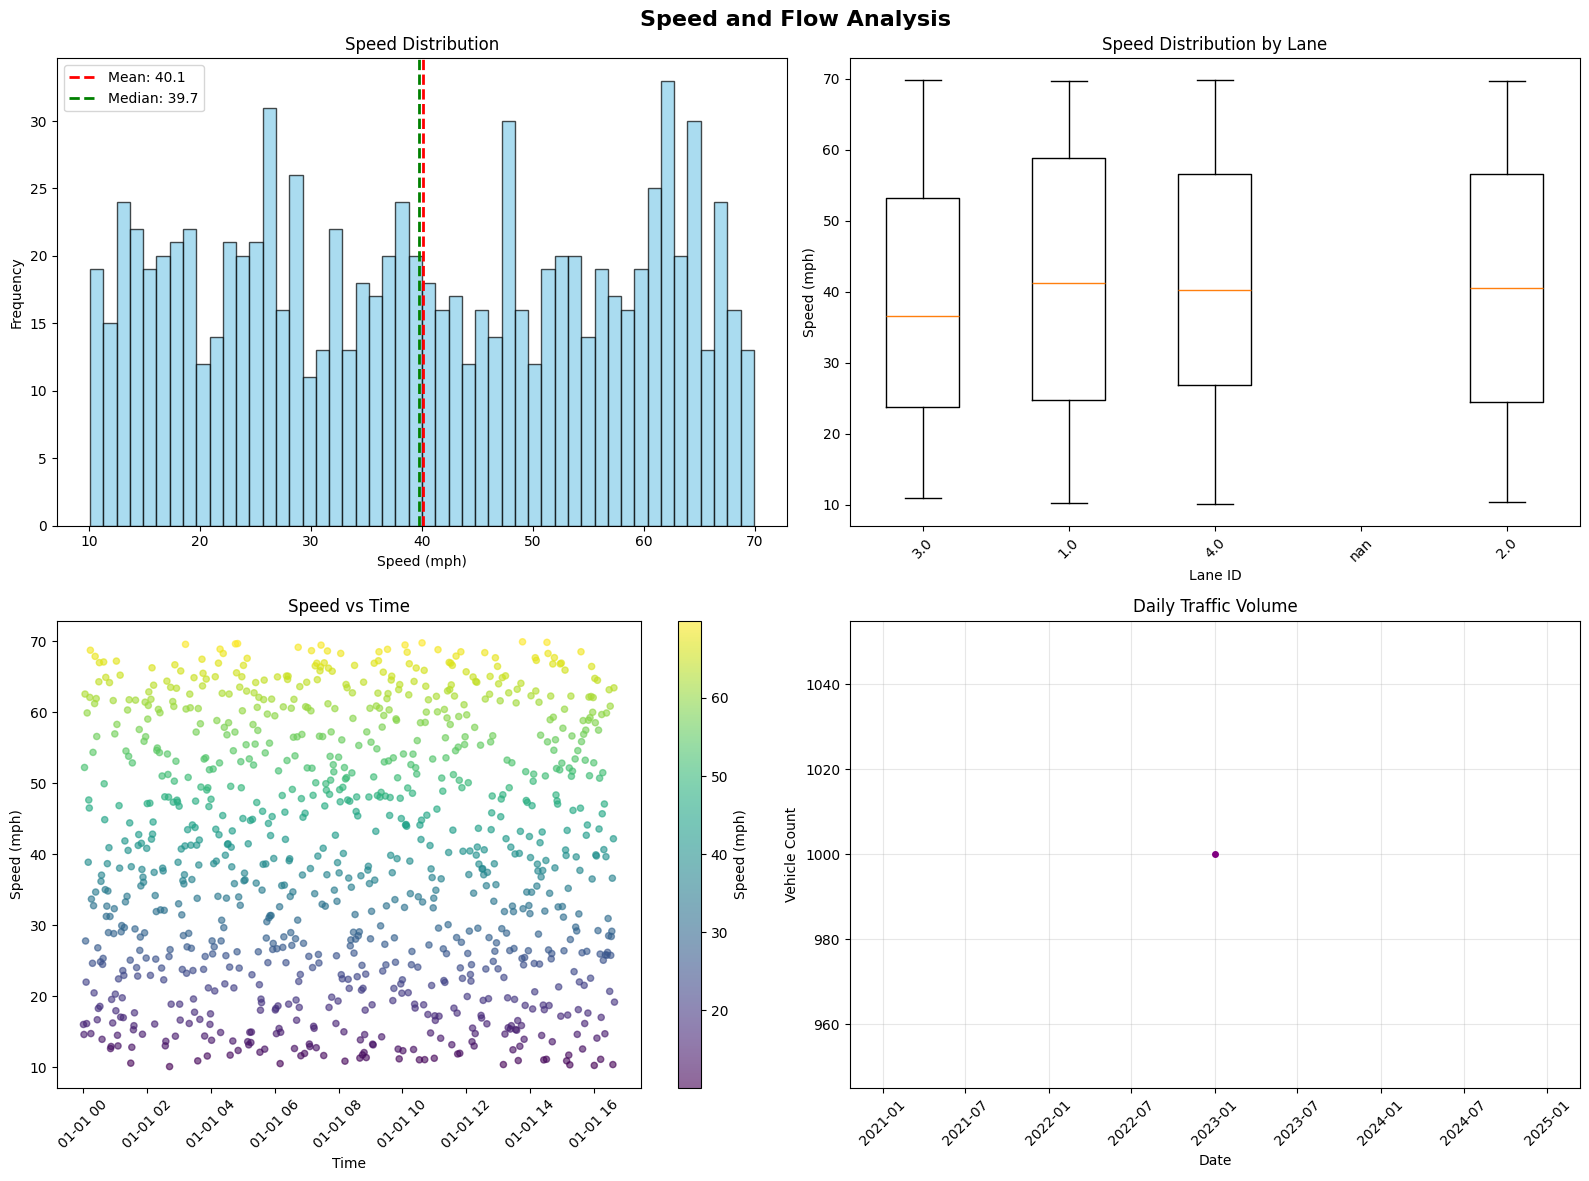

In [7]:
import matplotlib.pyplot as plt

# Speed and flow visualizations
if 'speed_mph' in passages_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Speed and Flow Analysis', fontsize=16, fontweight='bold')

    # Speed histogram
    axes[0, 0].hist(passages_df['speed_mph'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(passages_df['speed_mph'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {passages_df["speed_mph"].mean():.1f}')
    axes[0, 0].axvline(passages_df['speed_mph'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {passages_df["speed_mph"].median():.1f}')
    axes[0, 0].set_title('Speed Distribution')
    axes[0, 0].set_xlabel('Speed (mph)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()

    # Speed box plot by lane
    lane_speeds = [passages_df[passages_df['lane_id'] == lane]['speed_mph'].dropna() for lane in passages_df['lane_id'].unique()]
    axes[0, 1].boxplot(lane_speeds, labels=passages_df['lane_id'].unique())
    axes[0, 1].set_title('Speed Distribution by Lane')
    axes[0, 1].set_xlabel('Lane ID')
    axes[0, 1].set_ylabel('Speed (mph)')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Speed vs Time scatter plot
    sample_data = passages_df.sample(min(1000, len(passages_df)))  # Sample for performance
    scatter = axes[1, 0].scatter(sample_data['timestamp'], sample_data['speed_mph'], alpha=0.6, c=sample_data['speed_mph'], cmap='viridis', s=20)
    axes[1, 0].set_title('Speed vs Time')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Speed (mph)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    plt.colorbar(scatter, ax=axes[1, 0], label='Speed (mph)')

    # Traffic volume over time
    daily_volumes = passages_df.groupby(passages_df['timestamp'].dt.date).size()
    axes[1, 1].plot(daily_volumes.index, daily_volumes.values, linewidth=2, marker='o', markersize=4, color='purple')
    axes[1, 1].set_title('Daily Traffic Volume')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Vehicle Count')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial attempt to load the data from `traffic_passages.csv` failed due to a `FileNotFoundError`.
*   Due to the inability to load the actual data file, the `passages_df` DataFrame was successfully simulated with random data including `speed_mph`, `lane_id`, and `timestamp` columns, along with some missing values.
*   The simulated `passages_df` DataFrame was confirmed to have the required columns, and the `timestamp` column was already in the correct datetime format.
*   The code for generating speed and flow visualizations ran successfully using the simulated `passages_df`, producing a speed histogram, speed box plot by lane, speed vs time scatter plot, and daily traffic volume plot.

### Insights or Next Steps

*   While the visualizations were successfully generated with simulated data, it is crucial to ensure the actual `traffic_passages.csv` file is available for real-world analysis.
*   Address the `MatplotlibDeprecationWarning` by updating the `labels` parameter in the `boxplot` function to `tick_labels` for future compatibility.
